In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import h5py

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#pwd

In [3]:
#cp -r /kaggle/input/train-data .


In [4]:
#pwd

In [5]:
#ls -l train-data

# extracting test data**

In [6]:
'''# test
import pandas as pd
main_data = {}
sft_data = {}
test_filename = '/kaggle/input/train-data/00a6db666.hdf5'
with h5py.File(test_filename, "r") as f:
    for file_key in f.keys():
        group = f[file_key]
        print(group)
        try:
            for group_key in group.keys():
                group2 = group[group_key]
                main_data[group_key]= []
                if group_key == 'frequency_Hz':
                    main_data[group_key]=list(group[group_key])
                print(group_key)
                print(list(group2))
                print(f"---->{group2}")
                for group_key2 in group2.keys():
                        print(f"--------->{group2[group_key2]}")
                        sft_data[group_key2] = pd.DataFrame(group2[group_key2])
                        if group_key == 'frequency_Hz':
                            pass
                        else:
                            main_data[group_key].append(sft_data[group_key2])
        except AttributeError:
            pass'''

'# test\nimport pandas as pd\nmain_data = {}\nsft_data = {}\ntest_filename = \'/kaggle/input/train-data/00a6db666.hdf5\'\nwith h5py.File(test_filename, "r") as f:\n    for file_key in f.keys():\n        group = f[file_key]\n        print(group)\n        try:\n            for group_key in group.keys():\n                group2 = group[group_key]\n                main_data[group_key]= []\n                if group_key == \'frequency_Hz\':\n                    main_data[group_key]=list(group[group_key])\n                print(group_key)\n                print(list(group2))\n                print(f"---->{group2}")\n                for group_key2 in group2.keys():\n                        print(f"--------->{group2[group_key2]}")\n                        sft_data[group_key2] = pd.DataFrame(group2[group_key2])\n                        if group_key == \'frequency_Hz\':\n                            pass\n                        else:\n                            main_data[group_key].append(sft_da

In [49]:
# test
import numpy as np
import pandas as pd
main_data = {}
sft_data = {}
test_filename = '/kaggle/input/g2net-detecting-continuous-gravitational-waves/train/01bcf6533.hdf5'
with h5py.File(test_filename, "r") as f:
    for file_key in f.keys():
        group = f[file_key]
        print(group)
        try:
            for group_key in group.keys():
                group2 = group[group_key]
                main_data[group_key]= []
                if group_key == 'frequency_Hz':
                    main_data[group_key]=list(group[group_key])
                print(group_key)
                print(list(group2))
                print(f"---->{group2}")
                for group_key2 in group2.keys():
                        print(f"--------->{group2[group_key2]}")
                        sft_data[group_key2] = np.array(group2[group_key2])
                        if group_key == 'frequency_Hz':
                            pass
                        else:
                            main_data[group_key].append(sft_data[group_key2])
        except AttributeError:
            pass

<HDF5 group "/01bcf6533" (3 members)>
H1
['SFTs', 'timestamps_GPS']
----><HDF5 group "/01bcf6533/H1" (2 members)>
---------><HDF5 dataset "SFTs": shape (360, 4512), type "<c8">
---------><HDF5 dataset "timestamps_GPS": shape (4512,), type "<i8">
L1
['SFTs', 'timestamps_GPS']
----><HDF5 group "/01bcf6533/L1" (2 members)>
---------><HDF5 dataset "SFTs": shape (360, 4472), type "<c8">
---------><HDF5 dataset "timestamps_GPS": shape (4472,), type "<i8">
frequency_Hz
[386.915, 386.91555555555556, 386.91611111111115, 386.9166666666667, 386.9172222222222, 386.9177777777778, 386.91833333333335, 386.9188888888889, 386.9194444444445, 386.92, 386.92055555555555, 386.92111111111114, 386.9216666666667, 386.9222222222222, 386.9227777777778, 386.92333333333335, 386.9238888888889, 386.9244444444445, 386.925, 386.92555555555555, 386.92611111111114, 386.9266666666667, 386.9272222222222, 386.9277777777778, 386.92833333333334, 386.9288888888889, 386.92944444444447, 386.93, 386.9305555555556, 386.931111111

In [50]:
frequency = main_data['frequency_Hz']

In [51]:
frequency[len(frequency)-1]-frequency [0] 

0.19944444444445253

In [52]:
fourier_data = main_data['H1'][0]

In [54]:
matrix=np.absolute(fourier_data)
power = 10 * np.log10(matrix)

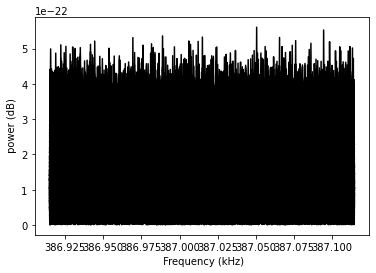

In [56]:
plt.figure()
plt.plot(frequency, matrix, color='black')
plt.xlabel(' Frequency (kHz)')
plt.ylabel(' power (dB)')
plt.show()